## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = "right", on="Mouse ID")

#Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
#Checking the number of mice.
mouse_count =len(combined_data["Mouse ID"].unique())
mouse_count

249

In [8]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_players= combined_data.duplicated(subset=["Mouse ID", "Timepoint"])
mice_players

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [9]:
#locate the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unique_count = combined_data.loc[mice_players, "Mouse ID"].unique()
unique_count

array(['g989'], dtype=object)

In [10]:
unique_count2 = combined_data["Mouse ID"].isin(unique_count)==False
clean_df = combined_data.loc[unique_count2, :]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
#Checking the number of mice in the clean DataFrame.
mice_count_clean = len(clean_df["Mouse ID"].unique())
mice_count_clean

248

In [12]:
#Display the total number of mice 
print(f" There are {mice_count_clean} in the dataset")

 There are 248 in the dataset


## Summary Statistics

In [13]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mice_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mice_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mice_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mice_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


#Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean Tumor Volume": mice_mean,
                                      "Median Tumor Volume ": mice_median,
                                      "Tumor Volume Variation": mice_var,
                                      "Tumor Volume Standard Deviation": mice_std,
                                      "Tumor Volume SEM": mice_sem})

#Display the summary table
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variation,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_stats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

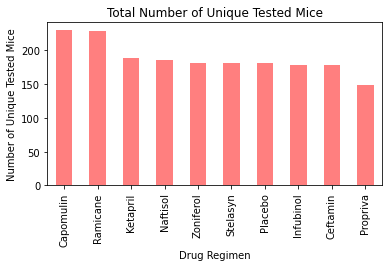

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice_count = clean_df["Drug Regimen"].value_counts()

# Use DataFrame.plot() in order to create a bar chart of the data
unique_mice_count.plot(kind="bar", figsize=(6,3), color = "r", alpha=0.5, align="center")

# Set a title for the chart
plt.title("Total Number of Unique Tested Mice")

# Set labels for the chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Tested Mice")

# Show the graph
plt.show()

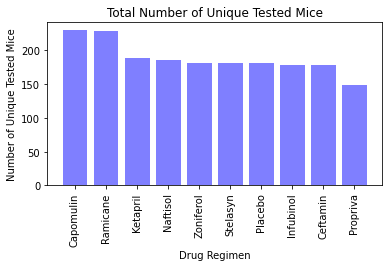

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot
unique_mice_count2 = clean_df['Drug Regimen'].value_counts()

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,3))
plt.bar(unique_mice_count2.index.values,unique_mice_count2.values, color="b", alpha=0.5, align="center")
plt.xticks(rotation="vertical")  

# Set a Title and labels
plt.title("Total Number of Unique Tested Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Tested Mice")

# Show the graph
plt.show()

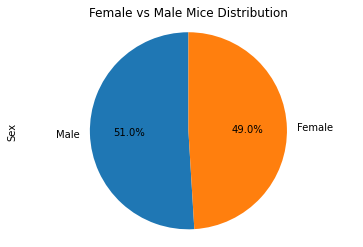

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df.Sex.value_counts()

# Use DataFrame.plot() in order to create a pie chart of the data
gender_count.plot(kind="pie", autopct="%1.1f%%",startangle=90)
plt.axis("equal")

# Set a title for the chart
plt.title("Female vs Male Mice Distribution")

#Show the graph
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count2 = clean_df.Sex.value_counts()

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,3))
plt.pie(gender_count2.index.values,unique_mice_count2.values, color="b", alpha=0.5, align="center")
plt.xticks(rotation="vertical")  

# Set labels for the chart
plt.ylabel("Number of Unique Mice Tested")

# Show the graph
plt.show()

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = []

# The colors of each section of the pie chart
colors = ["lightskyblue", "pink"]

# Set a Title and labels
plt.title("Total Number of Unique Tested Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Tested Mice")


# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1%%", shadow=True, startangle=140)

#Display pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()
                         
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = max_timepoint.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")

In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merge_data.loc[merge_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq, 2)

    print(f"The lower quartile of Tumor Volume (mm3) for {drug} is: {lowerq}")
    print(f"The upper quartile of Tumor Volume (mm3) for {drug} is: {upperq}")
    print(f"The interquartile range of Tumor Volume (mm3) for {drug} is: {iqr}")
    print(f"The median of Tumor Volume (mm3) for {drug} is: {quartiles[0.5]} ")

    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")

The lower quartile of Tumor Volume (mm3) for Capomulin is: 32.38
The upper quartile of Tumor Volume (mm3) for Capomulin is: 40.16
The interquartile range of Tumor Volume (mm3) for Capomulin is: 7.78
The median of Tumor Volume (mm3) for Capomulin is: 38.13 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
The lower quartile of Tumor Volume (mm3) for Ramicane is: 31.56
The upper quartile of Tumor Volume (mm3) for Ramicane is: 40.66
The interquartile range of Tumor Volume (mm3) for Ramicane is: 9.1
The median of Tumor Volume (mm3) for Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
The lower quartile of Tumor Volume (mm3) for Infubinol is: 54.05
The upper quartile of Tumor Volume (mm3) for Infubinol is: 65.53
The interquartile range of Tumor Volume (mm3) for Infubinol is: 11.48
The median of Tumor Volume (mm3) for Infubinol is: 60.17 
Values below 36.83 for Infu

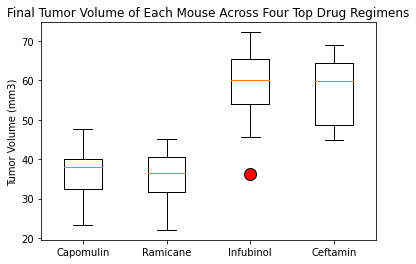

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
marker = dict(markerfacecolor= "r",markersize=10)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=orange_out)
plt.title("Final Tumor Volume of Each Mouse Across Four Top Drug Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Extract Capomulin data
capomulin_data = clean_df(clean_df["Drug Regimen"] ==["Capomulin"])

#Now extract the info on tumor volume vs. timepoint within Capomulin data
capomulin_data = capomulin_data.groupby[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

# Plot the world average as a line chart
world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# Plot the unemployment values for a single country
country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

SyntaxError: invalid syntax (<ipython-input-43-ea29d6c093bd>, line 8)

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Find mouse weight for Capomulin regimen
capomulin_weight_data = capomulin_data.groupby["Weight (g)"]

#Find average tumor volume for Capomulin regimen
avg_tumor_vol = capomulin_data.groupby["Tumor Volume (mm3)"].mean()

# Create a scatter plot which average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol.plot(kind="scatter", x=capomulin_weight_data, y=avg_tumor_vol, grid=True, figsize=(8,8))

# Set a Title and labels
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Display scatter plot
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coeffecient between mouse weight and average tumor volume is {round(st.pearsonr(capolmulin_data[])[0],2)}

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)

# Create equation of line to calculate predicted violent crime rate
mw_fit = mw_slope * year + mw_int

# Plot the linear model on top of scatter plot 
mouse_weight = clean_df.iloc[:,4]
avg_tumor_vol = clean_df.iloc[:,6]
plt.scatter(mouse_weight,avg_tumor_vol)
plt.plot(mouse_weight,mw_fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()                                                                                      